<a href="https://colab.research.google.com/github/Jaacunamatata/git-started/blob/jose/Denoising_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising Signals

This notebook is based on https://jinglescode.github.io/2020/09/15/an-introduction-to-signals/, a work of Hong Jing.




## Load packages

We will download [splearn](https://github.com/jinglescode/python-signal-processing), a package that consists of datasets, common signal processing functions and machine learning model architectures.

In [ ]:
#@title
!git clone https://github.com/jinglescode/python-signal-processing.git
%cd python-signal-processing
!pip install -r requirements.txt --quiet

#@title
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy

from splearn.data.generate import generate_signal # https://github.com/jinglescode/python-signal-processing/blob/main/splearn/data/generate.py

Cloning into 'python-signal-processing'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 465 (delta 258), reused 314 (delta 127), pack-reused 0
Receiving objects: 100% (465/465), 22.40 MiB | 35.50 MiB/s, done.
Resolving deltas: 100% (258/258), done.
/content/python-signal-processing
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Mean filter -- the simplest of all

The running mean filter (or the means moving filter) works by setting each data point in the filtered signal to be an average of the original signal's surrounding points.

For example, these are the data points in our signals, `[3, 4, 7, 2, 3, 6, 5]`. After applying a mean-smoothed filter, the value of each point is an average of the data point, `k` data point before, and `k` data point after. The number of data points we use to compute the average value is the `order of the filter`. For example, we use`k=1`, the average value of `[3, 4, 7]` is `4.6`.

In this graph, the blue line is the signal, and the orange line is the smoothed version of this signal.

Mean of [3, 4, 7] is 4.666666666666667
Mean of [4, 7, 2] is 4.333333333333333
Mean of [7, 2, 3] is 4.0
Mean of [2, 3, 6] is 3.6666666666666665
Mean of [3, 6, 5] is 4.666666666666667


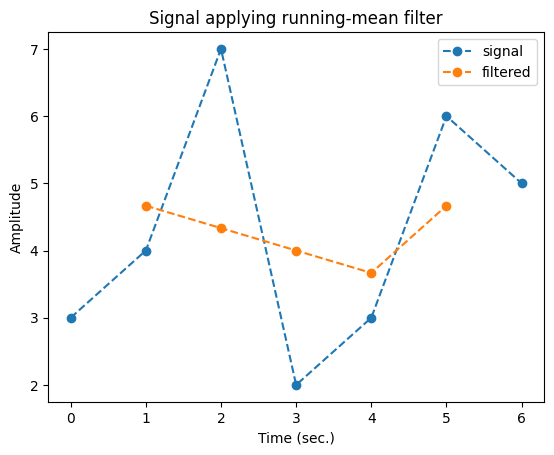

In [ ]:
#@title
s1 = [3, 4, 7, 2, 3, 6, 5]

n = len(s1)

filtered_s1 = [None] * n

k = 1 # filter window is k*2+1
for i in range(k,n-k):
    print('Mean of', s1[i-k:i+k+1], 'is', np.mean(s1[i-k:i+k+1]))
    filtered_s1[i] = np.mean(s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Signal applying running-mean filter')
plt.show()

## Edge effects

You may have noticed the missing values at the start and end of the filtered signal; these are called edge effects. We will see these edge effects every time you apply a temporal filter through any signals regardless of the type of filter.

So, what do we do with these edge points? There are a few common approaches.

- we can ignore them, like the graph above, we have `k*2` missing points where `k` is the filter size
- we can set it as the original signal
- we can pad the signal with `k` zeros infront and at the back of the signal.

There isn't a best or optimal way to deal with edge effects. We have to figure out what's the best way on a case-by-case basis.

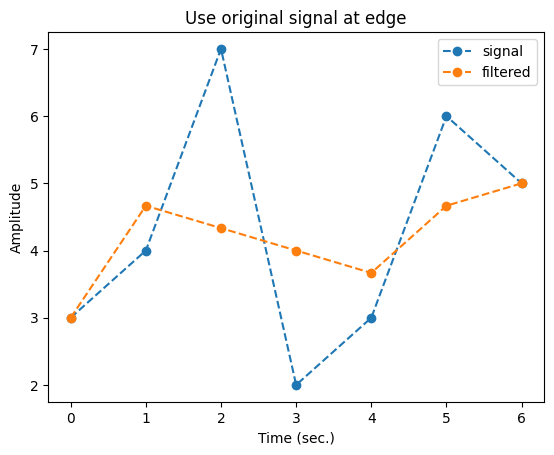

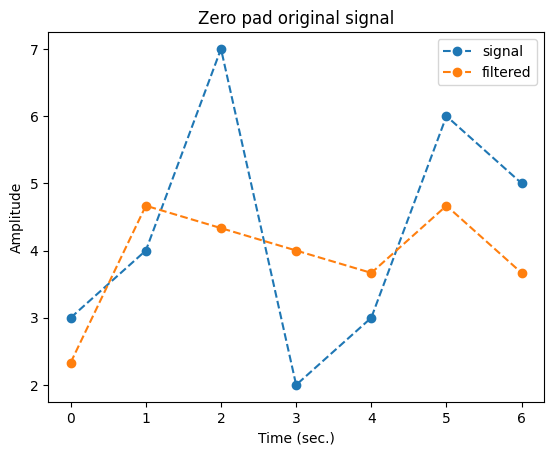

In [ ]:
#@title
s1 = [3, 4, 7, 2, 3, 6, 5]

n = len(s1)

filtered_s1 = copy.deepcopy(s1)

k = 1
for i in range(k,n-k):
    filtered_s1[i] = np.mean(s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Use original signal at edge')
plt.show()

#####

padded_s1 = [0, 3, 4, 7, 2, 3, 6, 5, 0]

n = len(padded_s1)

filtered_s1 = [None] * n

k = 1
for i in range(k,n-k):
    filtered_s1[i-1] = np.mean(padded_s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Zero pad original signal')
plt.show()

## Example with a slightly more complicated signal

Here we create a simple 1-Hz signal, on a sampling rate of 100. Then we add lots of noise, so much so that you don't see the 1-Hz signals anymore.

We apply a running mean filter on the time domain, with `k=10`; this will use the surrounding 21 points to compute each point's average value.

The graph below shows the original signal (blue line) and the filtered signal (orange line). I have also plotted the original 1-Hz signal for comparison.

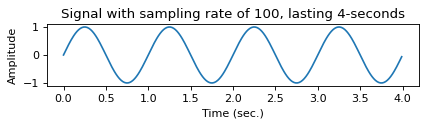

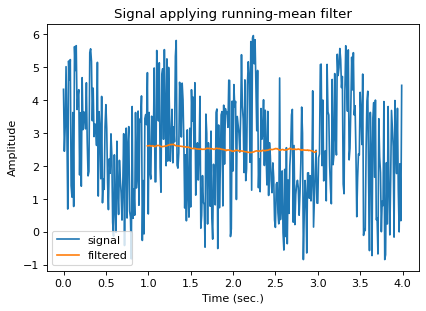

In [ ]:
sampling_rate = 100
duration = 4

# generate 1-Hz signal for comparison
figure(num=None, figsize=(6, 1), dpi=80, facecolor='w', edgecolor='k')
signal_1hz = generate_signal(
    length_seconds=duration,
    sampling_rate=sampling_rate,
    frequencies=[1],
    plot=True
)
plt.show()

# generate a noisy signal
signal_noisy = generate_signal(
    length_seconds=duration,
    sampling_rate=sampling_rate,
    frequencies=[1],
    add_noise=5,
)

time  = np.arange(0,duration,1/sampling_rate)
n = len(signal_noisy)

# apply running mean filter
filtered_signal = [None] * n

### TODO
## play with k (the size of the moving window)
k = 100

###
for i in range(k,n-k):
    filtered_signal[i-1] = np.mean(signal_noisy[i-k:i+k+1])

# plot signals
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time, signal_noisy, label='signal')
plt.plot(time, filtered_signal, label='filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Signal applying running-mean filter')
plt.show()

## Using a better filter than mean filter
Read this for reference: https://swharden.com/blog/2020-09-23-signal-filtering-in-python/

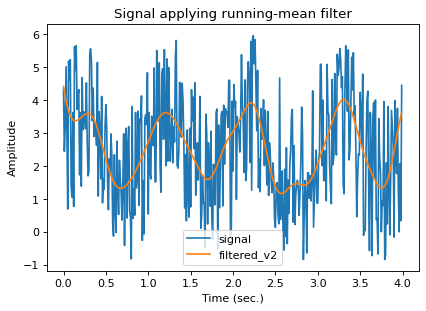

In [ ]:
import scipy.io.wavfile
import scipy.signal
# use a better filter
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

###TODO
#Use a filter from scipy.signal https://swharden.com/blog/2020-09-23-signal-filtering-in-python/, and choose the best performer.
## example:

#b, a = scipy.signal.butter(3, 0.05, 'lowpass')
#filtered_signal_v2 = scipy.signal.filtfilt(b, a, signal_noisy)

##
###

plt.plot(time, signal_noisy, label='signal')
plt.plot(time, filtered_signal_v2, label='filtered_v2')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Signal applying running-mean filter')
plt.show()